### 6-3．훈련 데이터의 작성
#### 데이터 리드

In [1]:
import pandas as pd

# 파일 리드
dat_df = pd.read_csv('energydata.csv', sep=',')[['date', 'Appliances']]

# date를 object형에서 datetime형으로 변환
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')

# 선두에서 5행까지 표시
dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


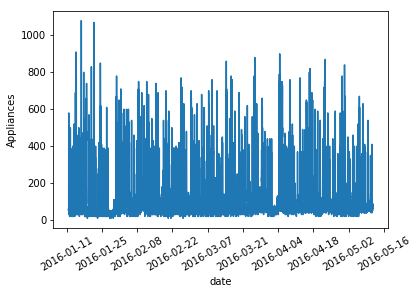

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('Appliances')
plt.show()

#### k 최근접 이웃 알고리즘에 의한 이상 검출

In [3]:
# 훈련데이터로 3개월분을 추출
train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

# 데스트 데이터로 1개월분을 추출
test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [4]:
# MinMaxScaler 를 로드
from sklearn.preprocessing import MinMaxScaler

# 훈련 데이터와 테스트 데이터의 범위변환
mc = MinMaxScaler()
train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']])

In [5]:
width = 144 # 슬라이드 창의 폭

train = train.flatten()
train_vec = []

# 부분시계열을 추출
for i in range(len(train)-width):
    train_vec.append(train[i:i+width])

# 부분시계열의 사이즈를 확인
print(pd.DataFrame(train_vec).shape)
# 부분시계열의 일부를 표시
pd.DataFrame(train_vec).head()

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794


In [6]:
# 연습문제7
test = test.flatten()
test_vec = []

# 부분시계열을 추출
for i in range(len(test)-width):
    test_vec.append(test[i:i+width])

# 부분시계열의 사이즈를 확인
print(pd.DataFrame(test_vec).shape)
# 부분시계열의 일부를 표시
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


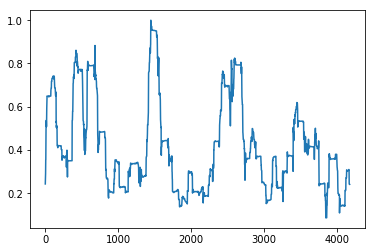

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Numpy 배열의 변환
train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

# k=1의 최근접 이웃 모델을 작성
model = NearestNeighbors(n_neighbors=1)
model.fit(train_vec)

# 모델을 테스트 데이터에 적용
dist, _ = model.kneighbors(test_vec)
dist = dist / np.max(dist)

# 이상 스코어의 가시화
plt.plot(dist)
plt.show()

#### 오토 인코더에 의한 이상 검출

In [8]:
!pip install keras

In [9]:
# keras 를 로드
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 인코드
model.add(Dense(128, activation='relu', input_shape=(144,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# 디코드
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# 출력층
model.add(Dense(144, activation='sigmoid'))

# 작성한 네트워크의 확인
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               18560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 144)               18576     
Total params: 57,904
Trainable params: 57,904
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습조건의 설정, 오차함수 = 평균제곱오차, 최적화방법 = Adam
model.compile(loss='mse', optimizer='adam')

# 학습의 실행
hist = model.fit(train_vec, train_vec, batch_size=128, 
                 verbose=1, epochs=20, validation_split=0.2)

Train on 10368 samples, validate on 2592 samples
Epoch 1/20
10368/10368 [==============================] - 2s 166us/step - loss: 0.0524 - val_loss: 0.0168
Epoch 2/20
10368/10368 [==============================] - 1s 138us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 3/20
10368/10368 [==============================] - 1s 144us/step - loss: 0.0161 - val_loss: 0.0153
Epoch 4/20
10368/10368 [==============================] - 1s 143us/step - loss: 0.0139 - val_loss: 0.0133
Epoch 5/20
10368/10368 [==============================] - 1s 125us/step - loss: 0.0104 - val_loss: 0.0085
Epoch 6/20
10368/10368 [==============================] - 1s 135us/step - loss: 0.0093 - val_loss: 0.0083
Epoch 7/20
10368/10368 [==============================] - 1s 127us/step - loss: 0.0083 - val_loss: 0.0060
Epoch 8/20
10368/10368 [==============================] - 1s 124us/step - loss: 0.0070 - val_loss: 0.0055
Epoch 9/20
10368/10368 [==============================] - 1s 126us/step - loss: 0.0065 - val_loss: 0.00

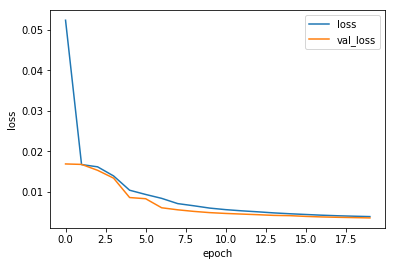

In [11]:
# 오차의 수렴상태를 플로트
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

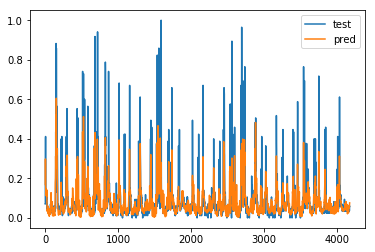

In [12]:
# 모델을 테스트 데이터에 적용
pred = model.predict(test_vec)

# 테스트 데이터와 출력 데이터의 가시화
plt.plot(test_vec[:,0], label='test')
plt.plot(pred[:,0], label='pred')
plt.legend()
plt.show()

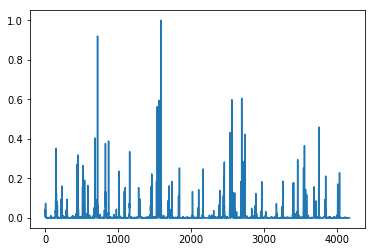

In [13]:
# 예측오차(이상 스코어)의 계산
dist = test_vec[:,0] - pred[:,0]
dist = pow(dist, 2)
dist = dist / np.max(dist)

# 이상 스코어를 가시화
plt.plot(dist)
plt.show()